In [27]:
import numpy as np

data=np.load('data/data.npy')
target=np.load('data/target.npy')
data.shape[1:]

(50, 50, 1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D, Dropout

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2048)           │    31,721,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,584,963 (124.30 MB)

 Trainable params: 32,584,963 (124.30 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [31]:
history=model.fit(train_data,train_target, validation_data=(test_data,test_target), epochs=100) #50-100

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 832ms/step - accuracy: 0.9727 - loss: 0.0465 - val_accuracy: 0.8269 - val_loss: 1.2747
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 669ms/step - accuracy: 0.9965 - loss: 0.0203 - val_accuracy: 0.8462 - val_loss: 1.0583
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 661ms/step - accuracy: 0.9933 - loss: 0.0314 - val_accuracy: 0.8462 - val_loss: 1.1839
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 853ms/step - accuracy: 0.9929 - loss: 0.0181 - val_accuracy: 0.8462 - val_loss: 1.2407
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 919ms/step - accuracy: 0.9924 - loss: 0.0292 - val_accuracy: 0.8462 - val_loss: 1.5117
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 673ms/step - accuracy: 0.9951 - loss: 0.0223 - val_accuracy: 0.8654 - val_loss: 1.3640
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 549ms/step - accuracy: 0.9933 - loss: 0.0239 - val_accuracy: 0.8654 - val_loss: 1.2864
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 542ms/step - accuracy: 0.9899 - loss: 0.0219 - va

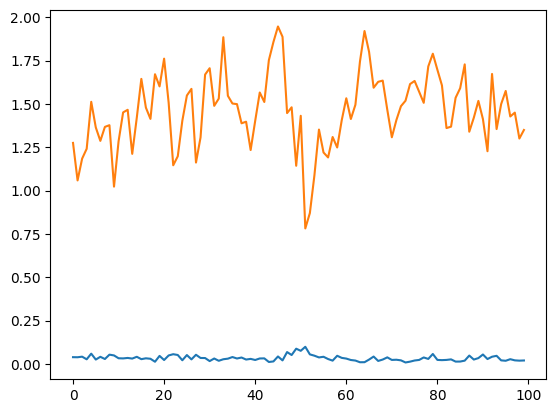

In [32]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

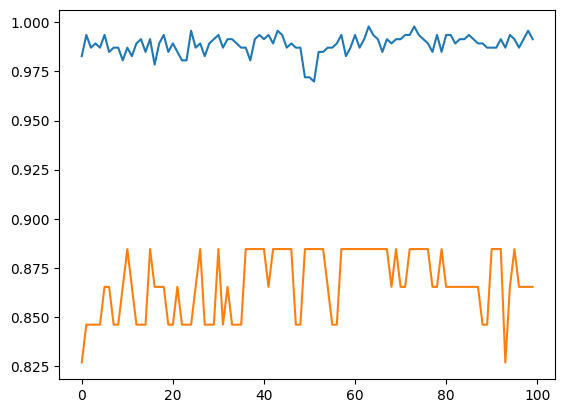

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [34]:
accc = model.evaluate(test_data,test_target)
print(accc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8582 - loss: 1.2932
[1.3492823839187622, 0.8653846383094788]


In [35]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Assuming model is defined somewhere before this code
y_pred1 = model.predict(test_data)

# If y_pred1 is probabilities, convert it to class labels
y_pred = np.argmax(y_pred1, axis=1)

# Convert test_target to binary if it's not already
if len(test_target.shape) > 1 and test_target.shape[1] > 1:
    test_target = np.argmax(test_target, axis=1)

# Calculate precision, recall, and F1 score with macro averaging
precision = precision_score(test_target, y_pred, average="macro")
recall = recall_score(test_target, y_pred, average="macro")
f1 = f1_score(test_target, y_pred, average="macro")

# Print the scores
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
Precision: 0.7754065040650406
Recall: 0.7954545454545454
F1 Score: 0.7582633053221288


In [36]:
model.save_weights(f'/coppeliasim-python/model_creation/models/Ai_Car-{accc[1]}.weights.h5')